In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [11]:
#データセットの読み込み
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [12]:
train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,SalePrice
0,856.0,854.0,0.0,3.0,706.0,0.0,1.0,0.0,150.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,208500
1,1262.0,0.0,0.0,3.0,978.0,0.0,0.0,1.0,284.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,181500
2,920.0,866.0,0.0,3.0,486.0,0.0,1.0,0.0,434.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,223500
3,961.0,756.0,0.0,3.0,216.0,0.0,1.0,0.0,540.0,272.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,140000
4,1145.0,1053.0,0.0,4.0,655.0,0.0,1.0,0.0,490.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,250000


In [13]:
train[["SalePrice"]]=train[["SalePrice"]].astype(float)

In [14]:
train.dtypes

1stFlrSF                 float64
2ndFlrSF                 float64
3SsnPorch                float64
BedroomAbvGr             float64
BsmtFinSF1               float64
BsmtFinSF2               float64
BsmtFullBath             float64
BsmtHalfBath             float64
BsmtUnfSF                float64
EnclosedPorch            float64
Fireplaces               float64
FullBath                 float64
GarageArea               float64
GarageCars               float64
GarageYrBlt              float64
GrLivArea                float64
HalfBath                 float64
KitchenAbvGr             float64
LotArea                  float64
LotFrontage              float64
LowQualFinSF             float64
MSSubClass               float64
MasVnrArea               float64
MiscVal                  float64
MoSold                   float64
OpenPorchSF              float64
OverallCond              float64
OverallQual              float64
PoolArea                 float64
ScreenPorch              float64
          

In [15]:
#データの詳細を確認
print(train.columns)

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'Street_Grvl', 'Street_Pave', 'Utilities_AllPub',
       'Utilities_NoSeWa', 'SalePrice'],
      dtype='object', length=271)


In [16]:
#array型に変換
x=np.array(train.iloc[:,0:270])
x[:1]

array([[  8.56000000e+02,   8.54000000e+02,   0.00000000e+00,
          3.00000000e+00,   7.06000000e+02,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.50000000e+02,
          0.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          5.48000000e+02,   2.00000000e+00,   2.00300000e+03,
          1.71000000e+03,   1.00000000e+00,   1.00000000e+00,
          8.45000000e+03,   6.50000000e+01,   0.00000000e+00,
          6.00000000e+01,   1.96000000e+02,   0.00000000e+00,
          2.00000000e+00,   6.10000000e+01,   5.00000000e+00,
          7.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          8.00000000e+00,   8.56000000e+02,   0.00000000e+00,
          2.00300000e+03,   2.00300000e+03,   2.00800000e+03,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

In [17]:
y=np.array(train.loc[:,["SalePrice"]])
y

array([[ 208500.],
       [ 181500.],
       [ 223500.],
       ..., 
       [ 266500.],
       [ 142125.],
       [ 147500.]])

In [18]:
#変数の標準化を行う
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_std=sc.fit_transform(x)
y_std=sc.fit_transform(y)

In [19]:
#標準化された説明変数を確認
x_std[:2]

array([[ -0.79343379,   1.16185159,  -0.11633929,   0.16377912,
          0.57542484,  -0.28865283,   1.10781015,  -0.24106104,
         -0.94459061,  -0.3593249 ,  -0.95122649,   0.78974052,
          0.35100032,   0.31172464,   0.93059199,   0.37033344,
          1.22758538,  -0.21145358,  -0.20714171,  -0.14618854,
         -0.12024172,   0.07337496,   0.51410389,  -0.08768781,
         -1.5991111 ,   0.21650316,  -0.51719981,   0.65147924,
         -0.06869175,  -0.27020835,   0.91220977,  -0.45930254,
         -0.75217584,   1.05099379,   0.87866809,   0.13877749,
          0.44353276,  -0.14728711,  -0.19217653,  -0.17420046,
         -0.29102473,  -0.17833149,  -0.21585871,  -0.03703704,
          0.33712564,  -0.42233832,  -0.31789276,  -0.29102473,
          0.72938618,  -0.42121177,  -0.33586437,   1.57886762,
         -0.23106504,  -0.31658502,  -0.64612362,  -0.11482721,
         -0.1520705 ,  -0.09839655,  -0.18036581,  -0.1959766 ,
          0.40301412,  -0.30060929,  -0.

In [20]:
#標準化した説明関数の平均が０に近いかを確認
x_std.mean()

1.792308902341592e-16

In [21]:
#標準化した説明関数の標準偏差を１に近いか確認
x_std.std()

1.0

In [22]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr_std=LinearRegression()
lr_std.fit(x_std,y_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
#標準回帰係数を出力（値が大きいほどこそ影響力が大きい）
lr_std.coef_

array([[  2.52612960e+07,   2.85246348e+07,   1.14458930e-02,
         -3.45693678e-02,   5.68690692e+09,   2.01142629e+09,
          5.35811484e-03,  -1.62332132e-03,   5.50946451e+09,
          3.05455923e-03,   2.06649303e-02,   2.51265764e-02,
          4.79321480e-02,   3.82357240e-02,  -6.04179502e-03,
         -3.43371350e+07,   7.34937191e-03,  -3.54749486e-02,
          9.44165587e-02,   1.26769245e-02,   3.17724004e+06,
         -1.67119503e-02,   4.26962376e-02,   6.91339374e-04,
         -1.47290193e-02,   2.89452076e-03,   8.03214908e-02,
          1.14185214e-01,   4.23097759e-02,   2.01644301e-02,
          2.16532946e-02,  -5.47004339e+09,   2.16174126e-02,
          1.22180760e-01,   2.49724686e-02,  -7.05881417e-03,
         -2.28021033e+10,  -8.86923851e+09,  -1.14022976e+10,
         -1.04018006e+10,  -1.65068547e+10,   1.12167940e+09,
          1.33852982e+09,   2.40036910e+08,   1.96462084e+09,
          5.18456399e-02,   9.01530981e-02,   2.43028104e-02,
        

In [23]:
df_data = pd.DataFrame(lr_std.coef_, columns=train.columns[0:270] ,index=["A"])

In [24]:
df_data.T.sort_values(by=["A"], ascending=False).head()

,A
ExterQual_TA,2.538345e+10
ExterQual_Gd,2.467600e+10
CentralAir_Y,1.086692e+10
CentralAir_N,1.086692e+10
ExterQual_Ex,9.694706e+09


In [25]:
#次に相関係数を見ていく
train.corr().head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,SalePrice
1stFlrSF,1.000000,-0.202646,0.056104,0.127401,0.445863,0.097117,0.244671,0.001956,0.317987,-0.065292,...,0.006094,-0.043721,0.221219,-0.008215,-0.198056,-0.005950,0.005950,-0.012287,0.012287,0.605852
2ndFlrSF,-0.202646,1.000000,-0.024358,0.502901,-0.137079,-0.099260,-0.169494,-0.023855,0.004469,0.061989,...,0.016175,0.012602,0.010810,-0.036082,0.026769,-0.046983,0.046983,0.020818,-0.020818,0.319334
3SsnPorch,0.056104,-0.024358,1.000000,-0.024478,0.026451,-0.029993,-0.000106,0.035114,0.020764,-0.037305,...,-0.006820,-0.006820,0.019596,-0.005279,-0.014211,-0.007473,0.007473,0.003046,-0.003046,0.044584
BedroomAbvGr,0.127401,0.502901,-0.024478,1.000000,-0.107355,-0.015728,-0.150673,0.046519,0.166643,0.041570,...,0.067108,-0.033529,-0.050702,0.025979,0.047667,-0.028865,0.028865,-0.004288,0.004288,0.168213
BsmtFinSF1,0.445863,-0.137079,0.026451,-0.107355,1.000000,-0.050117,0.649212,0.067418,-0.495251,-0.102303,...,0.022726,-0.017825,0.044883,0.010652,-0.024778,0.015643,-0.015643,0.019100,-0.019100,0.386420


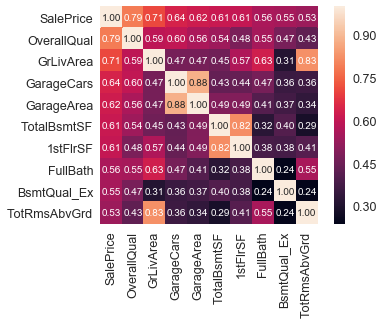

In [26]:
#相関係数の数値が大きい順に並べる
import seaborn as sns
corrmat = train.corr()
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.show()

In [27]:
df_pickup = train.loc[:, ['OverallQual', 'GrLivArea', 'ExterQual_TA', 'SalePrice']]

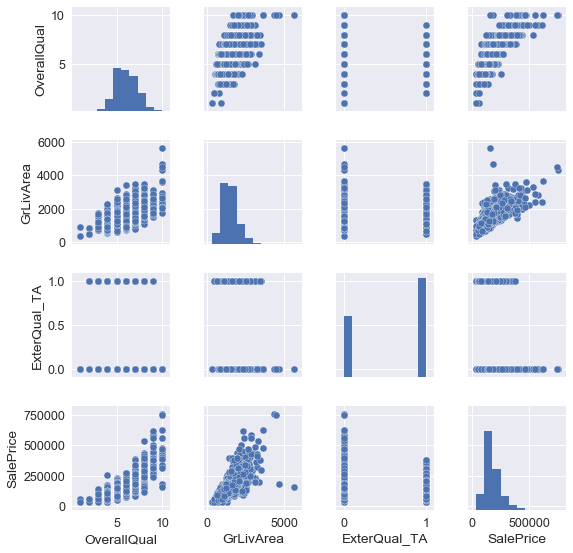

In [30]:
#相関係数が大きいものと先ほどの標準回帰で上位だったものを散布図行列で可視化
sns.pairplot(df_pickup, size=2.0)
plt.show()

In [31]:
# 超苦戦的な関係が見られる二つの特徴量を抽出
over = train.loc[:, ['OverallQual']].values    #OverallQual=Rates the overall material and finish of the house
ga = train.loc[:, ['GrLivArea']].values        #GrLivArea=Above grade (ground) living area square feet
y = train.loc[:, ["SalePrice"]].values

In [32]:
#xにすべての特徴量を組み込ませる。線形回帰
x_lin=np.hstack((over,ga))
from sklearn.model_selection import train_test_split
x_lin_train,x_lin_test,y_train,y_test=train_test_split(x_lin,y,test_size=0.3,random_state=0)
model_x=LinearRegression()
model_x.fit(x_lin_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
#自由度調整済み決定係数をみていく
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score

In [34]:
print('adjusted R^2')
print('train: %3f' % adjusted(model_x.score(x_lin_train, y_train), len(y), 2))

adjusted R^2
train: 0.723900


In [35]:
#それなりの決定係数が出たがさらに高めるために多項式回帰を行う
#それぞれ二次にする
over_train,over_test,_,_=train_test_split(over,y,test_size=0.3,random_state=0)
ga_train,ga_test,_,_=train_test_split(ga,y,test_size=0.3,random_state=0)
from sklearn.preprocessing import PolynomialFeatures
quad= PolynomialFeatures(degree=2)
over_x_quad=quad.fit_transform(over_train)
over_x_quad[:5]

array([[  1.,   7.,  49.],
       [  1.,   6.,  36.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   2.,   4.]])

In [36]:
ga_x_quad=quad.fit_transform(ga_train)
ga_x_quad[:5]

array([[  1.00000000e+00,   2.03400000e+03,   4.13715600e+06],
       [  1.00000000e+00,   1.29100000e+03,   1.66668100e+06],
       [  1.00000000e+00,   8.58000000e+02,   7.36164000e+05],
       [  1.00000000e+00,   1.25800000e+03,   1.58256400e+06],
       [  1.00000000e+00,   4.38000000e+02,   1.91844000e+05]])

In [37]:
x_lin_2=np.hstack((over_x_quad,ga_x_quad))
model_x_2=LinearRegression()
model_x_2.fit(x_lin_2,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
print('adjusted R^2')
print('train: %3f' % adjusted(model_x_2.score(x_lin_2, y_train), len(y_train), 2))

adjusted R^2
train: 0.761640


In [39]:
#決定係数が上昇した。さらに３次にしてみる
cubic= PolynomialFeatures(degree=3)
over_x_cubic=cubic.fit_transform(over_train)
ga_x_cubic=cubic.fit_transform(ga_train)
x_lin_3=np.hstack((over_x_cubic,ga_x_cubic))
model_x_3=LinearRegression()
model_x_3.fit(x_lin_3,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
print('adjusted R^2')
print('train: %3f' % adjusted(model_x_3.score(x_lin_3, y_train), len(y_train), 2))

adjusted R^2
train: 0.774995


In [41]:
#２次と３次でtrainとtestで比べる

#２次式
over_x2_quad=quad.fit_transform(over_test)
ga_x2_quad=quad.fit_transform(ga_test)
x_lin_test=np.hstack((over_x2_quad,ga_x2_quad))

print('adjusted R^2')
print('train: %3f' % adjusted(model_x_2.score(x_lin_2, y_train), len(y_train), 2))
print('test : %.3f' % adjusted(model_x_2.score(x_lin_test, y_test), len(y_test), 1))

adjusted R^2
train: 0.761640
test : 0.729


In [62]:
#３次式
over_x2_cubic=cubic.fit_transform(over_test)
ga_x2_cubic=cubic.fit_transform(ga_test)
x_lin_test2=np.hstack((over_x2_cubic,ga_x2_cubic))

print('model_cubic')
print('train: %3f' % adjusted(model_x_3.score(x_lin_3, y_train), len(y_train), 2))
print('test: %3f' % adjusted(model_x_3.score(x_lin_test2, y_test), len(y_test), 2))

model_cubic
train: 0.774995
test: 0.772238


In [63]:
#３次式ではtrainとtestがとても近い値になっているので妥当性があると考えられる。

In [64]:
#残差プロットを表示

def res_plot(y_train, y_train_pred, y_test, y_test_pred):
    # train, testごとに残差を算出
    res_train = y_train_pred - y_train
    res_test  = y_test_pred - y_test
    
    # train, testごとに(予測値, 残差)をプロット
    plt.figure(figsize=(8, 8))
    plt.scatter(y_train_pred, res_train, color='blue', marker='o', label='train', alpha=0.5)
    plt.scatter(y_test_pred, res_test, color='green', marker='s', label='test', alpha=0.5)
    
    plt.xlabel('Predicted Values')                  # x軸のラベルを表示
    plt.ylabel('Residuals')                         # y軸のラベルを表示
    plt.legend(loc='upper left')                    # 凡例を左上に表示
    plt.hlines(y=0, xmin=100000, xmax=700000, color='red') # 残差0の線を表示
    plt.show()

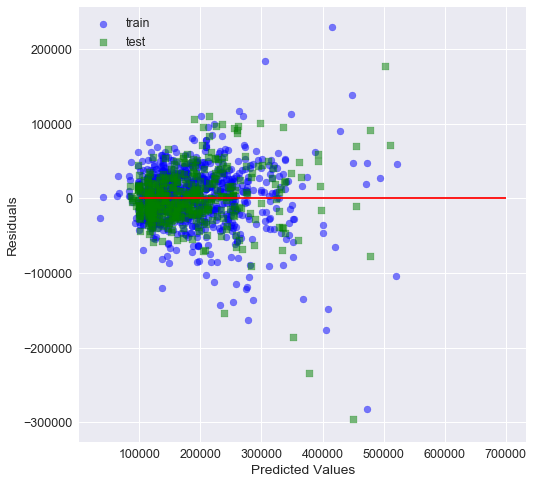

In [65]:
res_plot(y_train, model_x_3.predict(x_lin_3), y_test, model_x_3.predict(x_lin_test2))

In [66]:
#未知の値を代入していく

In [67]:
model_x_3.coef_

array([[  0.00000000e+00,   5.51167018e+04,  -1.04700470e+04,
          8.94004246e+02,  -3.54702934e-11,  -9.69183263e+01,
          8.30020576e-02,  -1.33402378e-05]])

In [68]:
testover = test.loc[:, ['OverallQual']].values    
testga = test.loc[:, ['GrLivArea']].values   
cubicover=cubic.fit_transform(testover)
cubicga=cubic.fit_transform(testga)

In [69]:
cubicover

array([[   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    5.,   25.,  125.],
       ..., 
       [   1.,    5.,   25.,  125.],
       [   1.,    5.,   25.,  125.],
       [   1.,    7.,   49.,  343.]])

In [70]:
w=model_x_3.coef_[:,0:4]
w

array([[     0.        ,  55116.70183258, -10470.04695912,    894.00424587]])

In [71]:
cubicover*w

array([[      0.        ,  275583.50916291, -261751.1739779 ,
         111750.53073388],
       [      0.        ,  330700.2109955 , -376921.69052817,
         193104.91710815],
       [      0.        ,  275583.50916291, -261751.1739779 ,
         111750.53073388],
       ..., 
       [      0.        ,  275583.50916291, -261751.1739779 ,
         111750.53073388],
       [      0.        ,  275583.50916291, -261751.1739779 ,
         111750.53073388],
       [      0.        ,  385816.91282808, -513032.30099668,
         306643.45633377]])

In [72]:
q=model_x_3.coef_[:,4:8]
q

array([[ -3.54702934e-11,  -9.69183263e+01,   8.30020576e-02,
         -1.33402378e-05]])

In [73]:
cubicga*q

array([[ -3.54702934e-11,  -8.68388204e+04,   6.66353799e+04,
         -9.59594171e+03],
       [ -3.54702934e-11,  -1.28804456e+05,   1.46601637e+05,
         -3.13139977e+04],
       [ -3.54702934e-11,  -1.57879954e+05,   2.20257663e+05,
         -5.76669291e+04],
       ..., 
       [ -3.54702934e-11,  -1.18628031e+05,   1.24351691e+05,
         -2.44628936e+04],
       [ -3.54702934e-11,  -9.40107765e+04,   7.80966360e+04,
         -1.21752749e+04],
       [ -3.54702934e-11,  -1.93836653e+05,   3.32008230e+05,
         -1.06721903e+05]])

In [74]:
z=cubicover*w+cubicga*q
z

array([[ -3.54702934e-11,   1.88744689e+05,  -1.95115794e+05,
          1.02154589e+05],
       [ -3.54702934e-11,   2.01895755e+05,  -2.30320053e+05,
          1.61790919e+05],
       [ -3.54702934e-11,   1.17703556e+05,  -4.14935109e+04,
          5.40836016e+04],
       ..., 
       [ -3.54702934e-11,   1.56955478e+05,  -1.37399483e+05,
          8.72876372e+04],
       [ -3.54702934e-11,   1.81572733e+05,  -1.83654538e+05,
          9.95752559e+04],
       [ -3.54702934e-11,   1.91980260e+05,  -1.81024071e+05,
          1.99921554e+05]])

In [75]:
z_sum = np.sum(z, axis=1)
print(z_sum[:10])
print(len(z_sum))

[  95783.4837212   133366.6214653   130293.64637039  149923.01238499
  212539.39023175  153355.86803159  126477.88025163  141094.54303966
  166551.70130885   80096.53296857]
1459


In [76]:
model_x_3.intercept_

array([ 18986.84084466])

In [77]:
z_sum2=z_sum + 18986.84084466
z_sum2

array([ 114770.32456586,  152353.46230996,  149280.48721505, ...,
        125830.47246408,  116480.29137151,  229864.58418862])

In [78]:
test2 = pd.DataFrame(z_sum2, columns=['SalePrice'])
test2

,SalePrice
0,114770.324566
1,152353.462310
2,149280.487215
3,168909.853230
4,231526.231076
5,172342.708876
6,145464.721096
7,160081.383884
8,185538.542154
9,99083.373813


In [79]:
test

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,896.0,0.0,0.0,2.0,468.0,144.0,0.0,0.0,270.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,1329.0,0.0,0.0,3.0,923.0,0.0,0.0,0.0,406.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,928.0,701.0,0.0,3.0,791.0,0.0,0.0,0.0,137.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,926.0,678.0,0.0,3.0,602.0,0.0,0.0,0.0,324.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,1280.0,0.0,0.0,2.0,263.0,0.0,0.0,0.0,1017.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
5,763.0,892.0,0.0,3.0,0.0,0.0,0.0,0.0,763.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
6,1187.0,0.0,0.0,3.0,935.0,0.0,1.0,0.0,233.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
7,789.0,676.0,0.0,3.0,0.0,0.0,0.0,0.0,789.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
8,1341.0,0.0,0.0,2.0,637.0,0.0,1.0,0.0,663.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
9,882.0,0.0,0.0,2.0,804.0,78.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [81]:
test2.to_csv("submit.csv")